<a href="https://colab.research.google.com/github/joshuabenedict-665/Mitbots_Internship/blob/main/Fit_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fit_or_not.csv to Fit_or_not (3).csv
Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.50      0.17      0.25         6

    accuracy                           0.85        40
   macro avg       0.68      0.57      0.58        40
weighted avg       0.81      0.85      0.82        40



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128306 (\N{BLACK SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


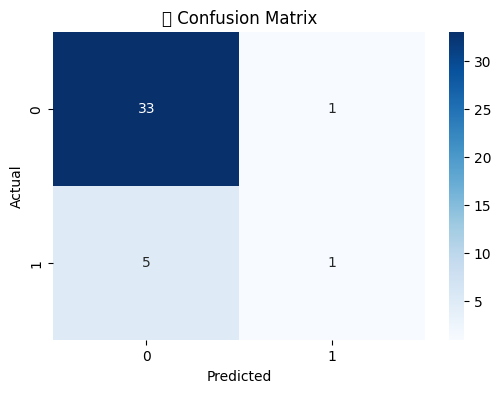

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Fit_or_not.csv")

X = df.drop(columns=['IsFit'])
y = df['IsFit']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔲 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()